In [92]:
#Compuational & Visualisation packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import nltk
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#Download English stopwords
nltk.download('punkt')

#Hide Warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adityakumar.94/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [93]:
#Load the global terror dataset
global_terror = pd.read_csv('data/global_terror_dataset.csv', encoding='ISO-8859-1')
global_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
global_terror=global_terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
global_terror['casualities']=global_terror['Killed']+global_terror['Wounded']

In [94]:
global_terror.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


## Quick statistics from the data

In [95]:
print('Country with Highest Terrorist Attacks:', str(global_terror['Country'].value_counts().index[0]))
print('Regions with Highest Terrorist Attacks:', str(global_terror['Region'].value_counts().index[0]))
print('Maximum people killed in an attack are:',global_terror['Killed'].max(),'that took place in', str(global_terror.loc[global_terror['Killed'].idxmax()].Country))

('Country with Highest Terrorist Attacks:', 'Iraq')
('Regions with Highest Terrorist Attacks:', 'Middle East & North Africa')
('Maximum people killed in an attack are:', 1500.0, 'that took place in', 'Iraq')


## Terrorist attack by year

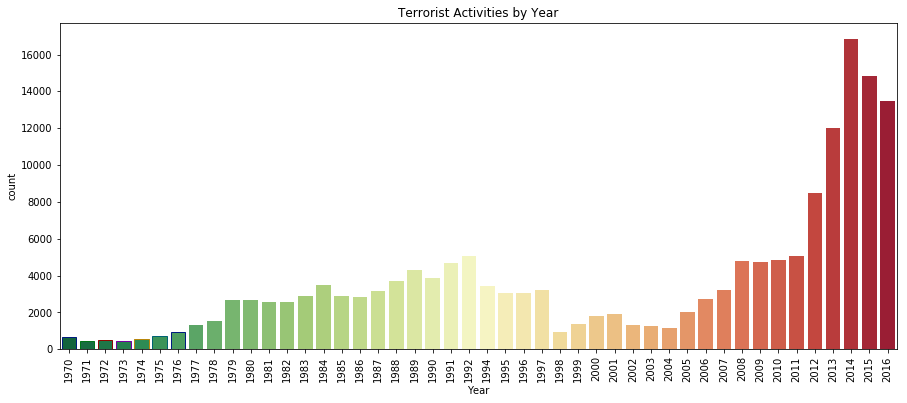

In [96]:
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=global_terror, palette='RdYlGn_r', edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Terrorist Activities by Year')
plt.show()

## Mediums of Terrorism Adopted

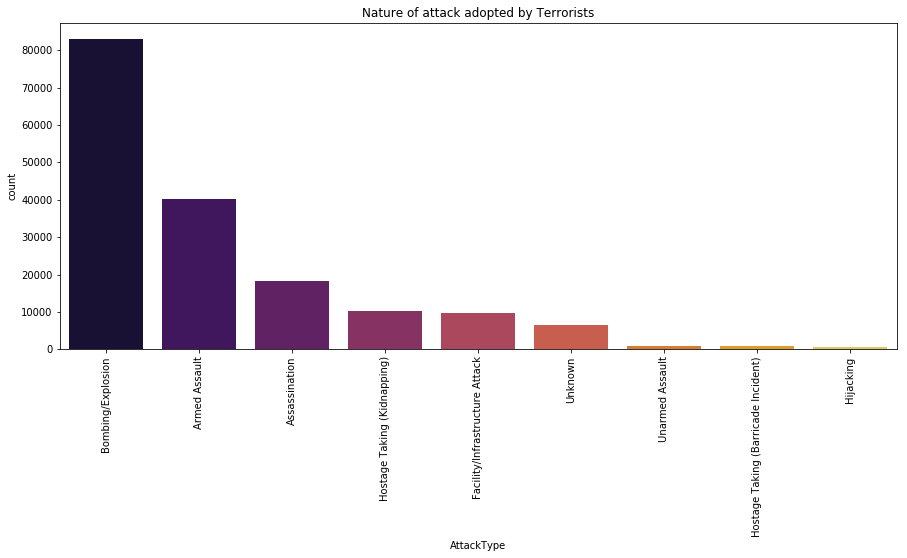

In [97]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType', data=global_terror, palette='inferno', order=global_terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Nature of attack adopted by Terrorists')
plt.show()

## Victims of terrorist activities

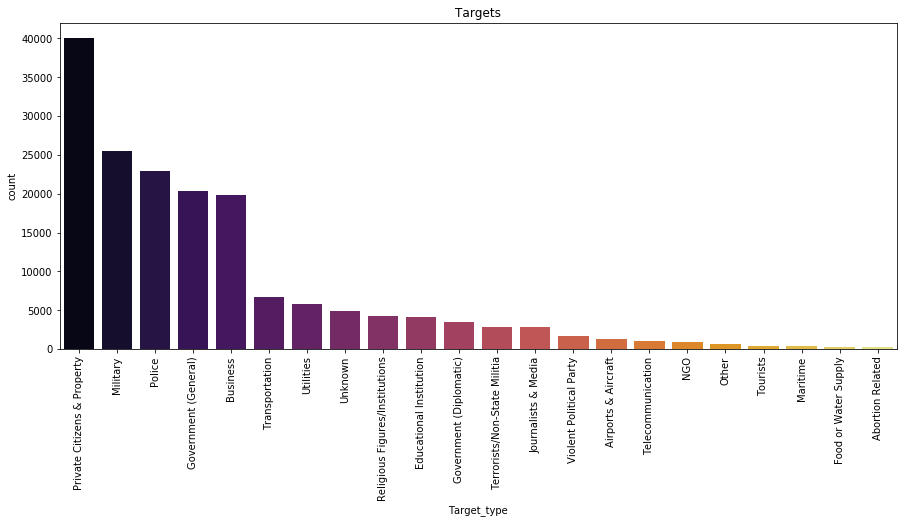

In [98]:
plt.subplots(figsize=(15,6))
sns.countplot(global_terror['Target_type'], palette='inferno', order=global_terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Targets')
plt.show()

## Terrorist activity plot on a global map

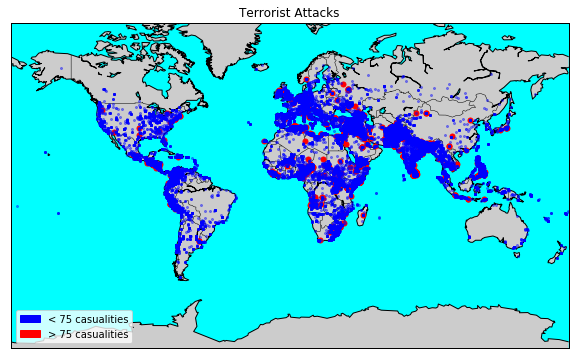

In [99]:
m3 = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20,\
             resolution='c', lat_0=True, lat_1=True)
lat_100=list(global_terror[global_terror['casualities']>=75].latitude)
long_100=list(global_terror[global_terror['casualities']>=75].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(global_terror[global_terror['casualities']<75].latitude)
long_=list(global_terror[global_terror['casualities']<75].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

## Terrorist activities by region

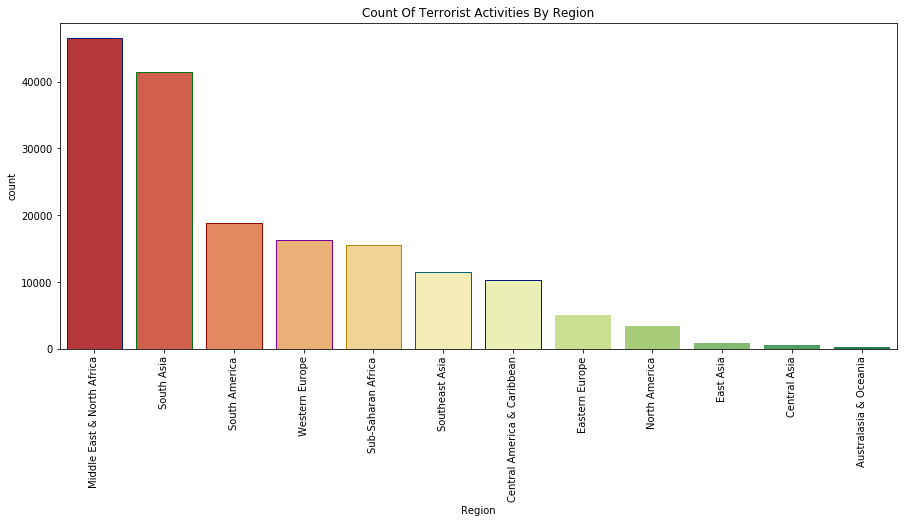

In [100]:
plt.subplots(figsize=(15,6))
sns.countplot('Region', data=global_terror, palette='RdYlGn', edgecolor=sns.color_palette('dark',7), \
              order=global_terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count Of Terrorist Activities By Region')
plt.show()

## Time series analysis of the trend in the terrorist activities

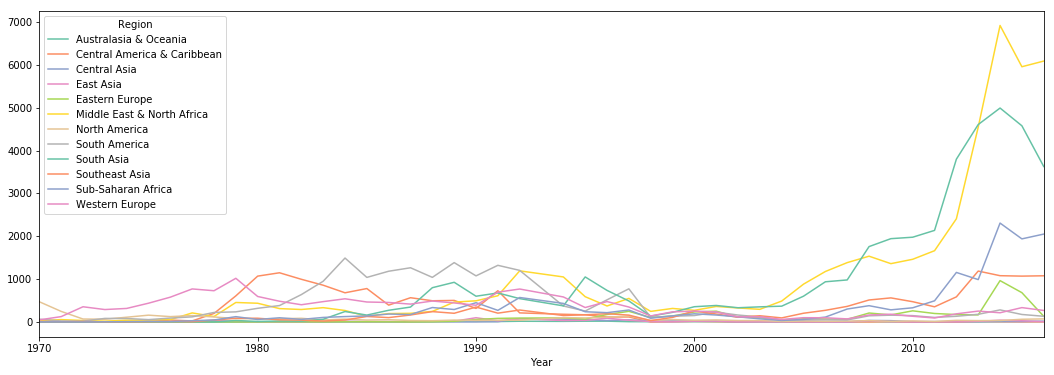

In [101]:
terror_region = pd.crosstab(global_terror.Year, global_terror.Region)
terror_region.plot(color = sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## Terrorism grouped by country

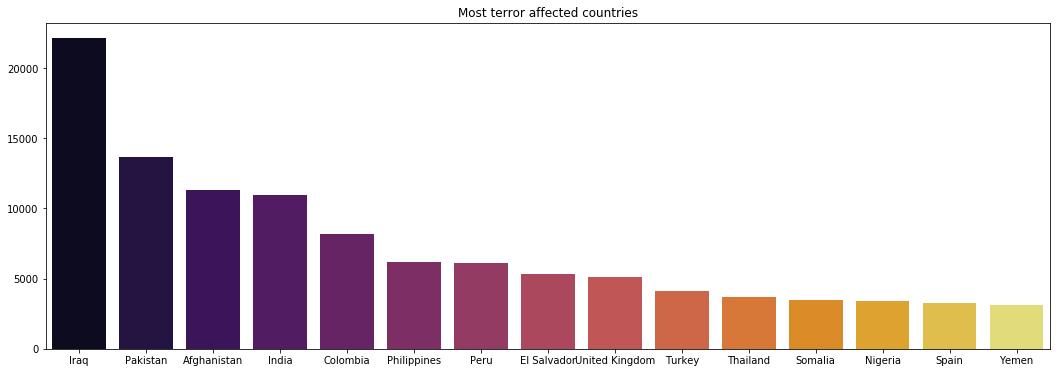

In [102]:
plt.subplots(figsize=(18,6))
sns.barplot(global_terror['Country'].value_counts()[:15].index,global_terror['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Most terror affected countries')
plt.show()

## Attack type by region

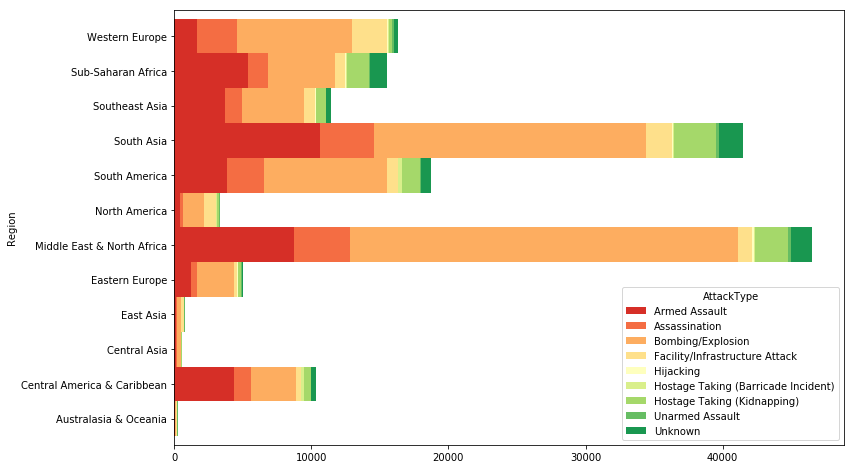

In [103]:
pd.crosstab(global_terror.Region,global_terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

## Attacked v/s Killed

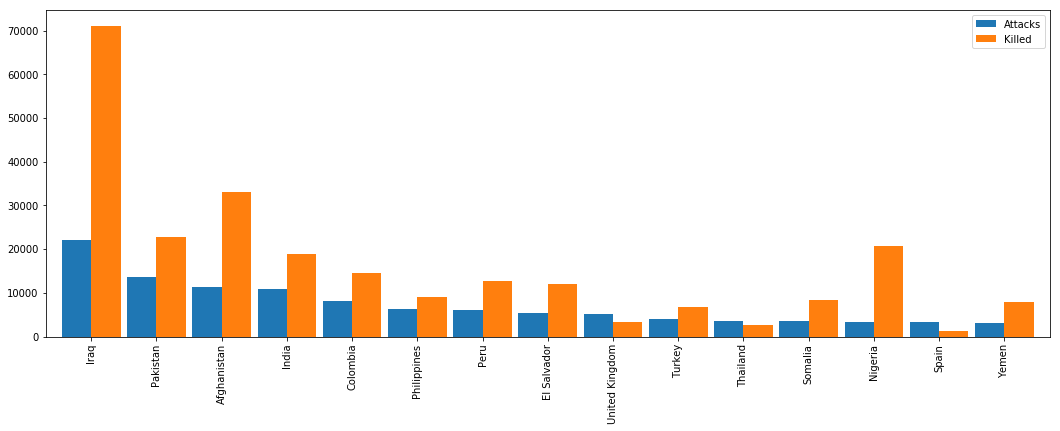

In [104]:
coun_terror=global_terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=global_terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## Regions Attacked by the Terrorist groups

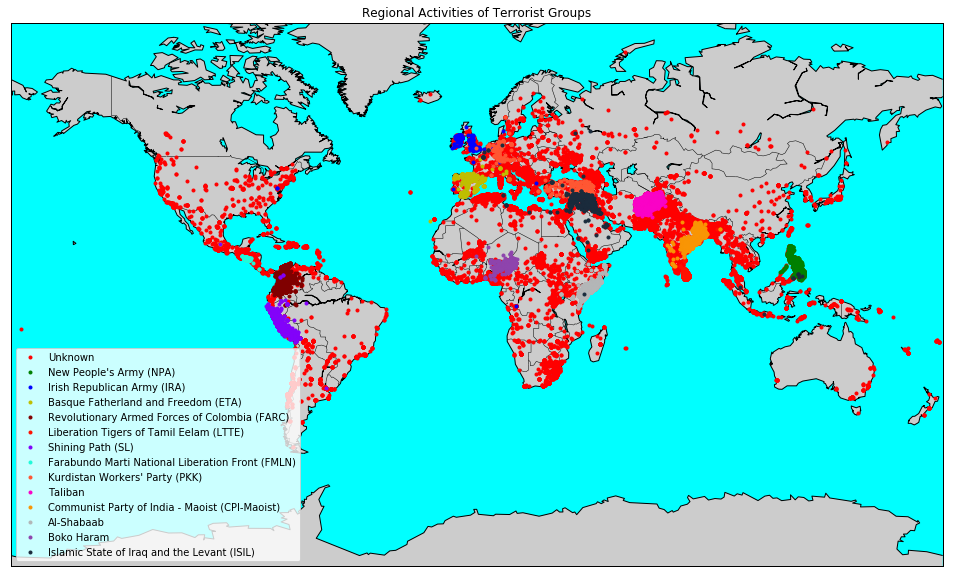

In [105]:
top_groups=global_terror[global_terror['Group'].isin(global_terror['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='aqua')
m4.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

## Most active terrorist organizations

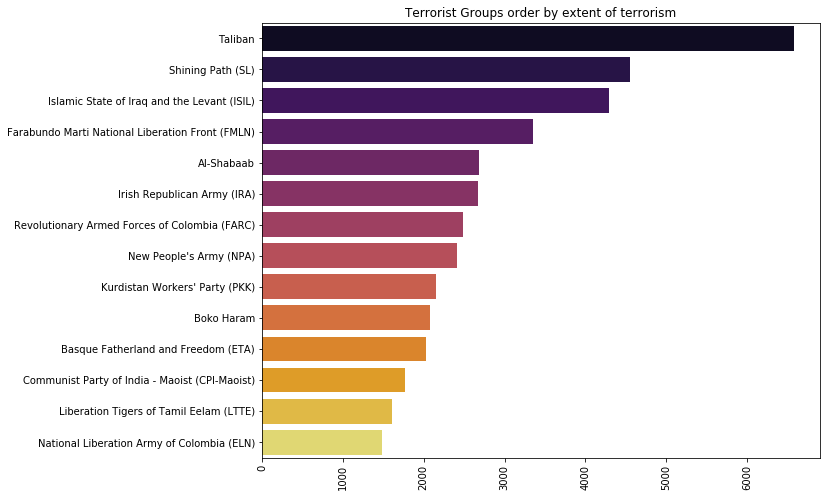

In [106]:
sns.barplot(global_terror['Group'].value_counts()[1:15].values, global_terror['Group'].value_counts()[1:15].index,\
            palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups order by extent of terrorism')
plt.show()

## Time series of the activities of the terror organizations

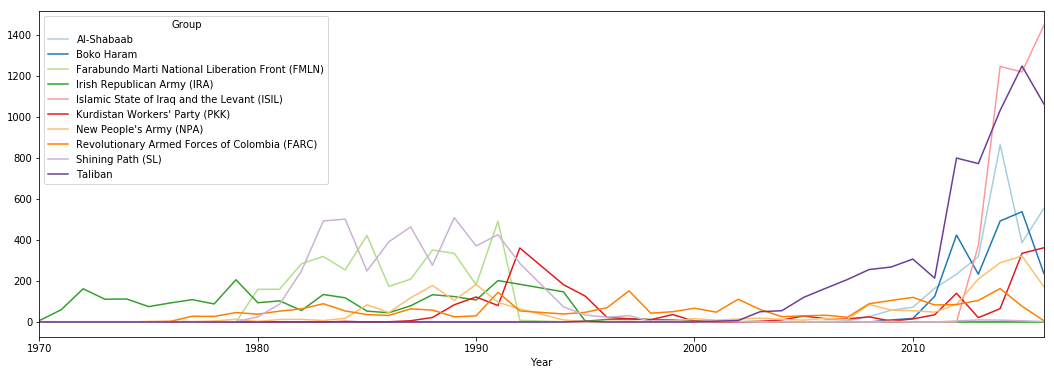

In [107]:
top_groups10=global_terror[global_terror['Group'].isin(global_terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()


In [108]:
def groups_attackTypes_plot(df, country_groups):
    f,ax=plt.subplots(1,2,figsize=(25,12))
    usa_groups=df['Group'].value_counts()[1:11].index
    usa_groups=df[df['Group'].isin(country_groups)]
    sns.countplot(y='Group',data=country_groups,ax=ax[0])
    sns.countplot(y='AttackType',data=df,ax=ax[1])
    plt.subplots_adjust(hspace=0.3,wspace=0.6)
    ax[0].set_title('Top Terrorist Groups')
    ax[1].set_title('Favorite Attack Types')
    ax[0].tick_params(labelsize=15)
    ax[1].tick_params(labelsize=15)
    plt.show()

## Most deadly terror organizations in the USA and their common attack types

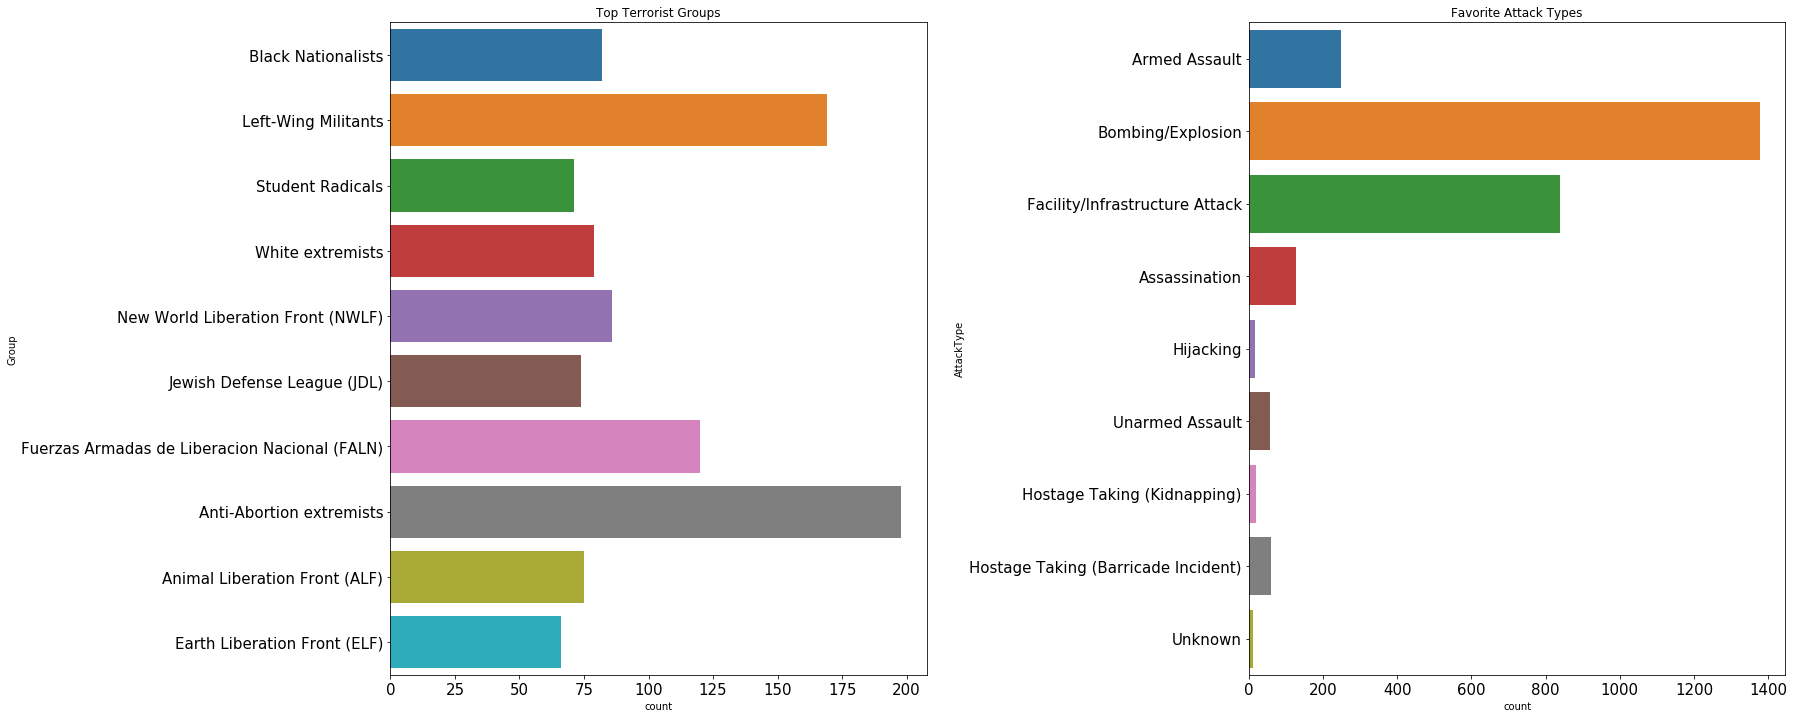

In [109]:
terror_usa=global_terror[global_terror['Country']=='United States']
usa_groups=terror_usa['Group'].value_counts()[1:11].index
usa_groups=terror_usa[terror_usa['Group'].isin(usa_groups)]
groups_attackTypes_plot(terror_usa, usa_groups)

## Most deadly terror organizations in Pakistan and their common attack types


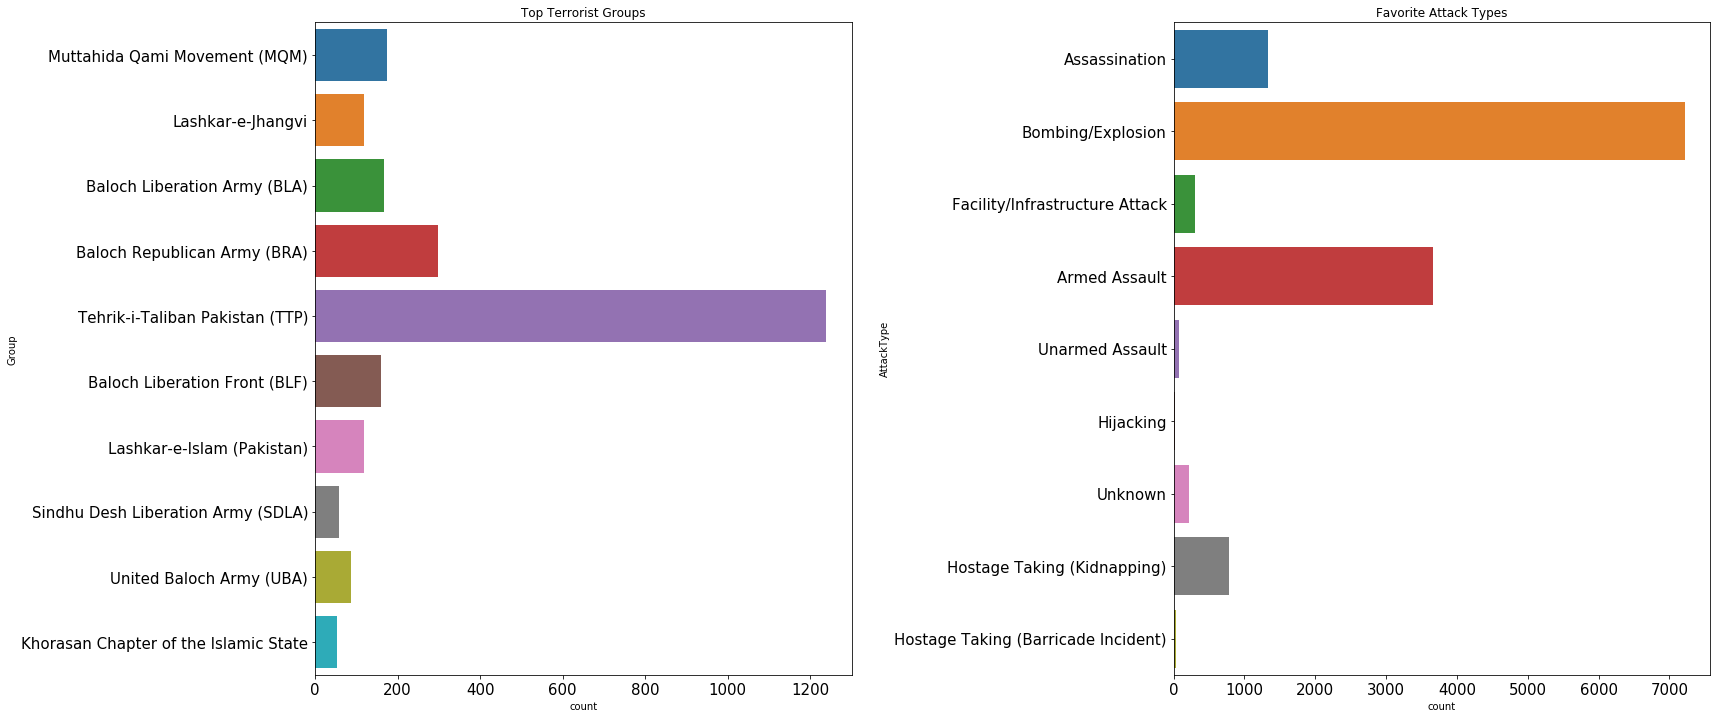

In [110]:
terror_pak=global_terror[global_terror['Country']=='Pakistan']
pak_groups=terror_pak['Group'].value_counts()[1:11].index
pak_groups=terror_pak[terror_pak['Group'].isin(pak_groups)]
groups_attackTypes_plot(terror_pak, pak_groups)

## Using NLP to find the motives behind the attack

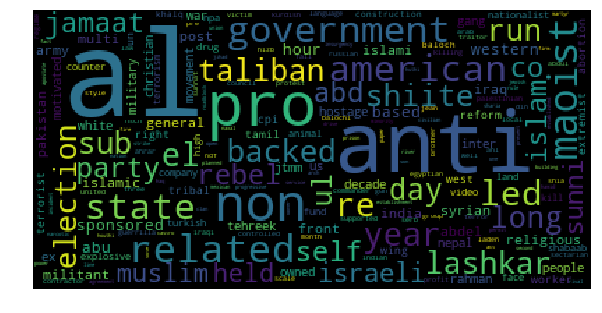

In [111]:
motive=global_terror['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()